<a href="https://colab.research.google.com/github/BenJoshMudi/GOMYCODE.BEN/blob/main/API_Nasa_Checkpoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python -m pip install requests

In [25]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

api_url = "https://api.nasa.gov/planetary/apod?api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v"
response = requests.get(api_url)
apod_data = response.json()
apod_data

{'date': '2024-06-21',
 'explanation': "Returning to science operations on June 14, the Hubble Space Telescope used its new pointing mode to capture this sharp image of spiral galaxy NGC 1546. A member of the Dorado galaxy group, the island universe lies a mere 50 million light-years away. The galactic disk of NGC 1546 is tilted to our line-of-sight, with the yellowish light of the old stars and bluish regions of newly formed stars shining through the galaxy's dust lanes. More distant background galaxies are scattered throughout this Hubble view. Launched in 1990, Hubble has been exploring the cosmos for more than three decades, recently celebrating its 34th anniversary.",
 'hdurl': 'https://apod.nasa.gov/apod/image/2406/NGC1546compassHST.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': "Hubble's NGC 1546",
 'url': 'https://apod.nasa.gov/apod/image/2406/NGC1546compassHST1024.jpg'}

In [22]:
image_url = apod_data['url']
image_title = apod_data['title']

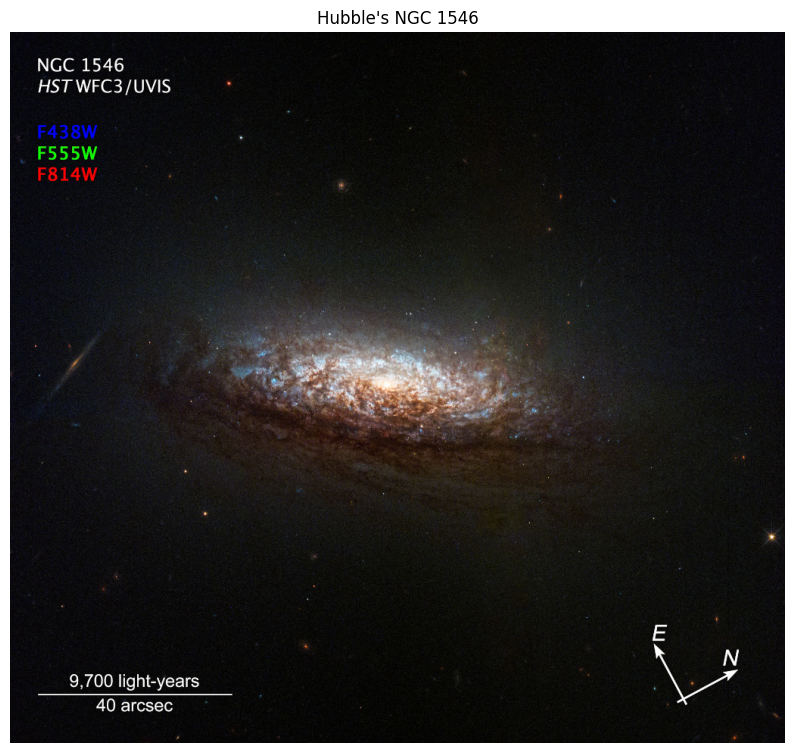

In [24]:
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title(image_title)
plt.show()

In [45]:
# NeoWS API for near-earth objects
neows_api_url = "https://api.nasa.gov/neo/rest/v1/feed?start_date=2024-06-20&end_date=2024-06-20&api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v"
neows_response = requests.get(neows_api_url)
neows_data = neows_response.json()
neows_data

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-06-21&end_date=2024-06-21&detailed=false&api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v',
  'prev': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-06-19&end_date=2024-06-19&detailed=false&api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-06-20&end_date=2024-06-20&detailed=false&api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v'},
 'element_count': 12,
 'near_earth_objects': {'2024-06-20': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2302523?api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v'},
    'id': '2302523',
    'neo_reference_id': '2302523',
    'name': '302523 (2002 KH3)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2302523',
    'absolute_magnitude_h': 17.56,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.8176265334,
      'estimated_diameter_max': 1.8282685088},
     '

In [39]:
# Extract near-earth object data
asteroids = []
for date in neows_data['near_earth_objects']:  # Iterate over dates in NeoWS data
    for asteroid in neows_data['near_earth_objects'][date]:
        asteroids.append({
            'Asteroid ID': asteroid['id'],
            'Asteroid Name': asteroid['name'],
            'Minimal_Estimated_Diameter_km': asteroid['estimated_diameter']['kilometers']['estimated_diameter_min'],
            'Absolute_Magnitude': asteroid['absolute_magnitude_h'],
            'Relative_Velocity_km_s': asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_second']
        })

In [43]:
# Convert to DataFrame and export
df = pd.DataFrame(asteroids)
csv_filename = 'asteroids_data.csv'
df.to_csv(csv_filename, index=False)
print(f"DataFrame exported to {csv_filename}")

DataFrame exported to asteroids_data.csv


In [44]:
df.head()

,Asteroid ID,Asteroid Name,Minimal_Estimated_Diameter_km,Absolute_Magnitude,Relative_Velocity_km_s
0,2302523,302523 (2002 KH3),0.817627,17.56,11.1893813549
1,2469896,469896 (2005 WC1),0.195234,20.67,27.9300310814
2,3279464,(2005 LV7),0.394962,19.14,15.0692148106
3,3553279,(2010 XB24),0.114434,21.83,10.6906503026
4,3761030,(2016 TQ56),0.041933,24.01,9.9419822512
